In [63]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Carregar dados

In [64]:
data_path = "data/breast-cancer-wisconsin.data"
column_names = ["id", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]

df = pd.read_csv(data_path, header=None, names=column_names, index_col="id")
df.tail()

,A,B,C,D,E,F,G,H,I,J
id,,,,,,,,,,
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4
897471,4,8,6,4,3,4,10,6,1,4
897471,4,8,8,5,4,5,10,4,1,4


### 2. Função que conta quantas vezes cada classe aparece

In [65]:
def occur_classes(column):
    occurences = {}
    for value in column:
        if value not in occurences:
            occurences[value] = 1
        else:
            occurences[value] += 1
    return occurences

In [66]:
occurences = occur_classes(df['J'])
print(f"occorencias: {occurences}")

occorencias: {2: 458, 4: 241}


### 3. Gráfico de barras

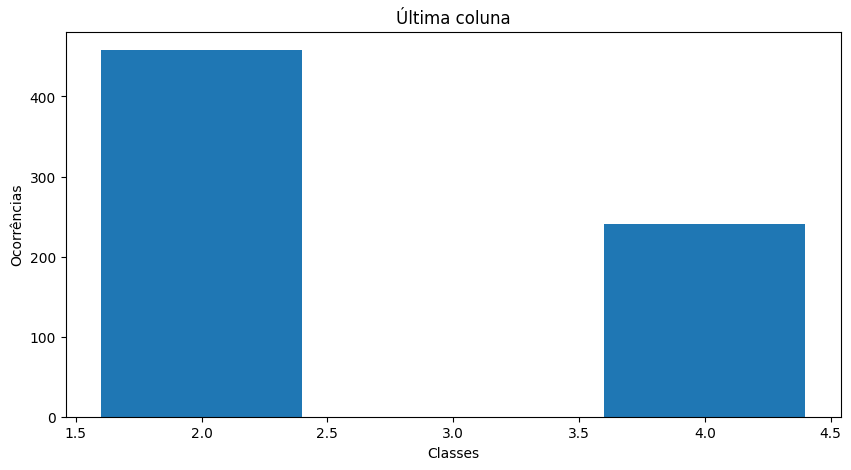

In [67]:
plt.figure(figsize=(10, 5))
plt.bar(list(occurences.keys()), list(occurences.values()))
plt.title(f"Última coluna")
plt.xlabel("Classes")
plt.ylabel("Ocorrências")
plt.show()

### 4. Métricas de colunas

In [68]:
df = df.rename(columns={'B': 'Clump Thickness', 'E': 'Marginal Adhesion', 'G':'Bare Nuclei', 'J':'Mitoses'})
columns_interest = ['Clump Thickness', 'Marginal Adhesion', 'Bare Nuclei', 'Mitoses']

for column in columns_interest:
    media = df[column].mean()
    mediana = df[column].median()
    moda = df[column].mode().iloc[0]  


    # Desvio absoluto medio
    mad = (df[column] - media).abs().mean()

    variancia = df[column].var()
    desvio_padrao = df[column].std()
    
    # Calcula a porcentagem alem do desvio padrão
    beyond_one_std = df[(df[column] > media + desvio_padrao) | (df[column] < media - desvio_padrao)].shape[0]
    percentual_beyond = (beyond_one_std / df.shape[0]) * 100
    
    print(f"\n--- {column} ---")
    print(f"Média: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Moda: {moda:.2f}")
    print(f"Desvio Absoluto Médio: {mad:.2f}")
    print(f"Variância: {variancia:.2f}")
    print(f"Desvio Padrão: {desvio_padrao:.2f}")
    print(f"Percentual além de um desvio padrão: {percentual_beyond:.2f}%")
    
    print('')


--- Clump Thickness ---
Média: 3.13
Mediana: 1.00
Moda: 1.00
Desvio Absoluto Médio: 2.51
Variância: 9.31
Desvio Padrão: 3.05
Percentual além de um desvio padrão: 17.31%


--- Marginal Adhesion ---
Média: 3.22
Mediana: 2.00
Moda: 2.00
Desvio Absoluto Médio: 1.69
Variância: 4.90
Desvio Padrão: 2.21
Percentual além de um desvio padrão: 22.03%


--- Bare Nuclei ---
Média: 3.44
Mediana: 3.00
Moda: 2.00
Desvio Absoluto Médio: 1.95
Variância: 5.95
Desvio Padrão: 2.44
Percentual além de um desvio padrão: 20.31%


--- Mitoses ---
Média: 2.69
Mediana: 2.00
Moda: 2.00
Desvio Absoluto Médio: 0.90
Variância: 0.90
Desvio Padrão: 0.95
Percentual além de um desvio padrão: 34.48%



### Análise de Simetria das Distribuições

#### Clump Thickness
**Distribuição**: Assimétrica para direita (positiva)
**Justificativa**: Média (3.13) > Mediana (1.00) = Moda (1.00)

#### Marginal Adhesion
**Distribuição**: Assimétrica para direita (positiva)
**Justificativa**: Média (3.22) > Mediana (2.00) = Moda (2.00)

#### Bare Nuclei
**Distribuição**: Assimétrica levemente para direita (positiva)
**Justificativa**: Média (3.44) > Mediana (3.00) > Moda (2.00)

#### Mitoses
**Distribuição**: Assimétrica para direita (positiva)
**Justificativa**: Média (2.69) > Mediana (2.00) = Moda (2.00)

### 5. gráfico de caixa

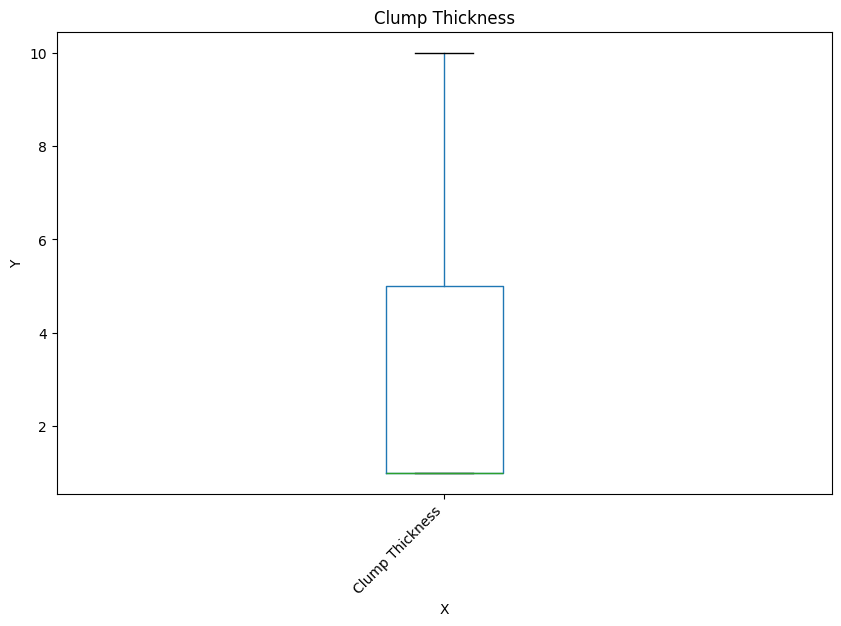

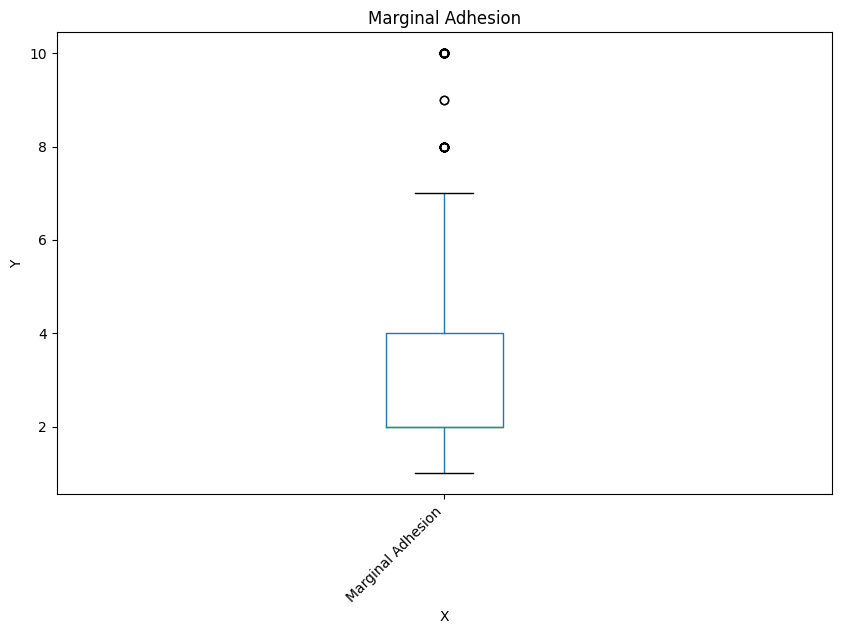

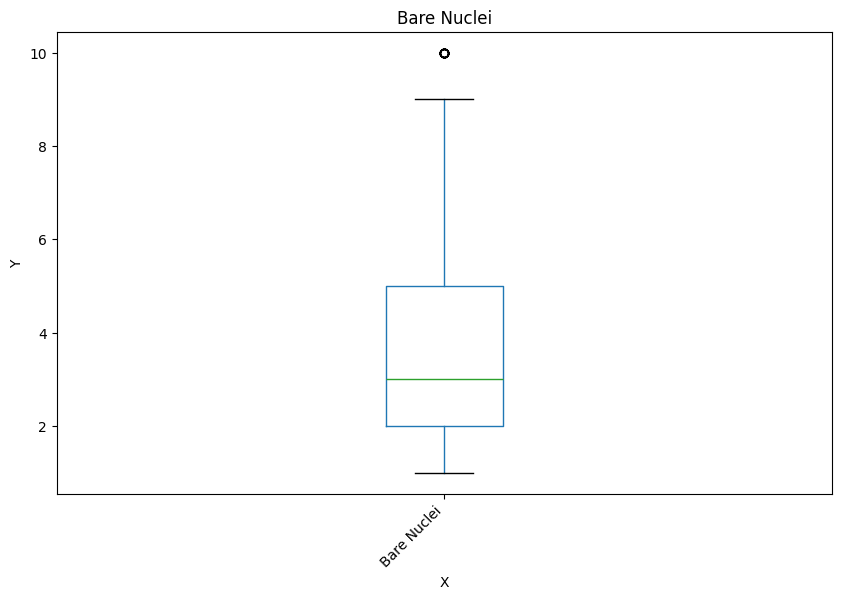

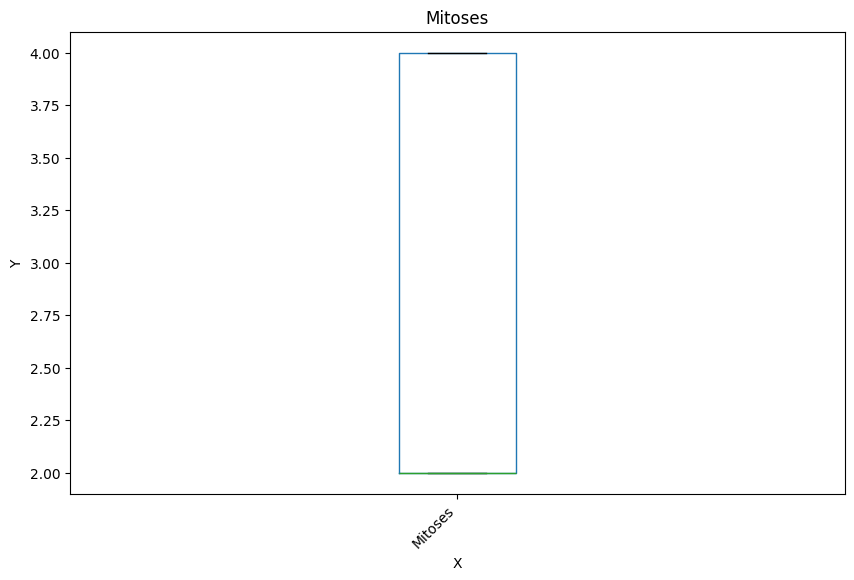

In [69]:
for column in columns_interest:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=column, grid=False)
    plt.title(f'{column}')
    plt.suptitle('')  
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xticks(rotation=45, ha='right')
    plt.show() 
    